Importing essential libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading (first column containing date-time stamp is set as index) and presenting data:

In [2]:
df = pd.read_csv('../working_data/Data1.csv',index_col=0)
df.head()

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433


Melting dataframe from form of:

index, $\theta_1$, $\theta_2$, $\theta_3$, $\theta_4$, $\theta_5$, $\theta_6$

into: 

index, $\theta$, value

In [8]:
dfm = df.melt()

Plotting each column as timeseries with respect to index column (date-time stamp), each on seperate plot:

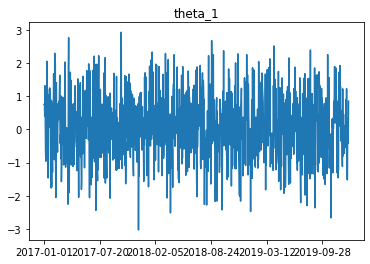

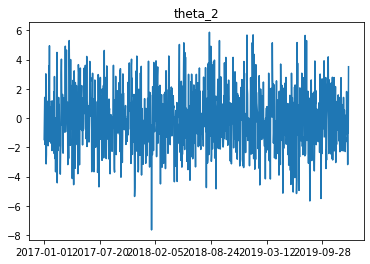

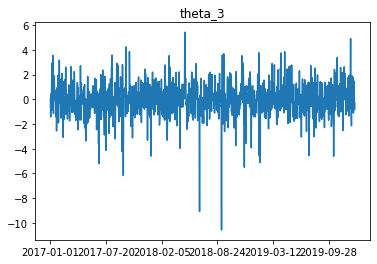

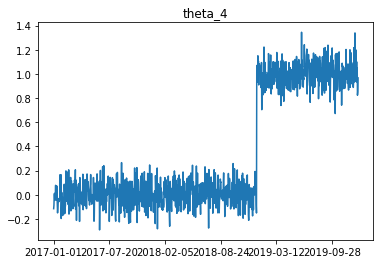

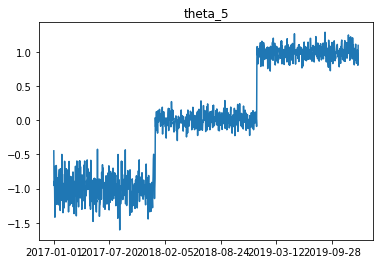

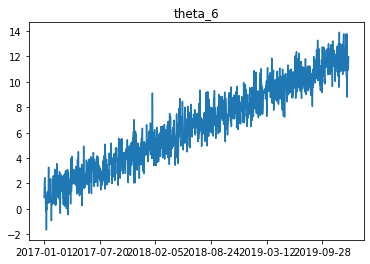

In [3]:
for c in df.columns:
    df[c].plot()
    plt.title(c)
    plt.show()

Plotting each column as timeseries with respect to index column (date-time stamp) on the same plots:

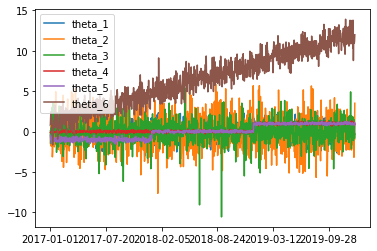

In [6]:
for c in df.columns:
    df[c].plot()
plt.legend(df.columns)
plt.show()

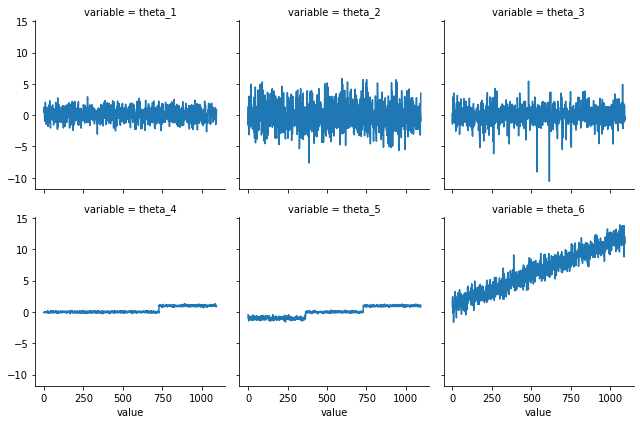

In [10]:
g = sns.FacetGrid(dfm, col='variable', col_wrap=3, sharex = True, sharey=True)
g = g.map(plt.plot, 'value')

Visualizing all timeseries in one plot can give more sense about scales of different variables. It's clear now, that variables have different variances. $\theta_5$ and $\theta_4$ are much less noisy and $\theta_2$ is much more noisy than the other ones.

Also there can be observed some trends in variables $\theta_4$, $\theta_5$, $\theta_6$ while rest is centered around some constant. One can be assume that  variables $\theta_4$, $\theta_5$ are unit step (or it's combinatons in case variables $\theta_5$) with some noise added. A linear trend in variable variables $\theta_6$ can be observed.

Creating a facet grid and creating histograms for each variable in different cell:

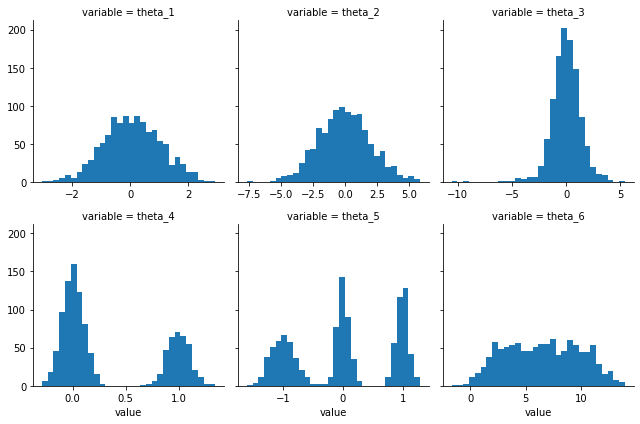

In [11]:
g = sns.FacetGrid(dfm, col='variable', col_wrap=3, sharex = False)
g = g.map(plt.hist, 'value', bins=30)

Analyzing the above histograms, one can observe that:
- observations of variable $\theta_2$ are most dispersed from those constant trend
- $\theta_3$ has two observations that strongly differ from the rest. Those outliers probably could be omited in the rest of analysis process.
- $\theta_4$, $\theta_5$ have visible peaks in numbers of observations, which are caused by their step function trend ($\theta_4$ have more observations around 0 because step occured relatively late, $\theta_5$ observations around $-1$ are more dispersed than those centered at $0$ and $1$)
-  $\theta_6$ histogram has kind of constant shape ending with bell-shaped tails. Removing the linear trend from it would probably leave one bell shaped curve


Creating a facet grid with _Kernal Density Estimation_ plots:

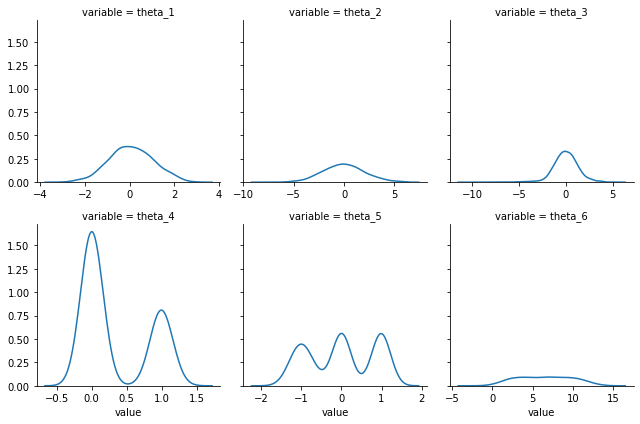

In [7]:
f = sns.FacetGrid(dfm, col='variable', col_wrap=3, sharex = False)
f = f.map(sns.kdeplot, 'value')

Kernal density estimation is a way of estimation of variable's probability density function. Their shapes strongly correspond to shapes of histograms of variables. 

Limiting dataframe to contain only variables $\theta_1$ to $\theta_4$ noted only in year 2018 and repeating whole process presented above for limited data:

In [13]:
df2 = df.loc['2018-01-01':'2018-12-31','theta_1':'theta_4']
df2.head()

,theta_1,theta_2,theta_3,theta_4
2018-01-01,0.682693,-3.091767,-0.475717,-0.238530
2018-01-02,-0.283107,-0.979955,1.233933,0.158031
2018-01-03,1.572221,-2.033528,2.196317,0.041347
2018-01-04,-1.042981,0.651530,1.060125,0.064832
2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025


.loc() method is a convinient way to separate parts of observations.


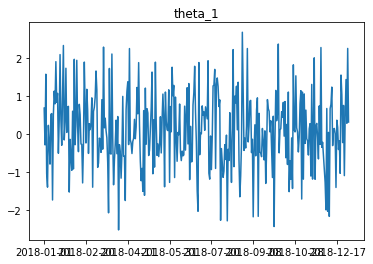

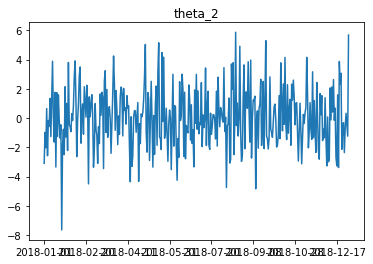

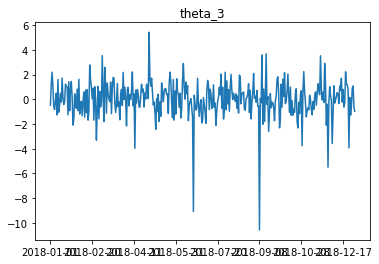

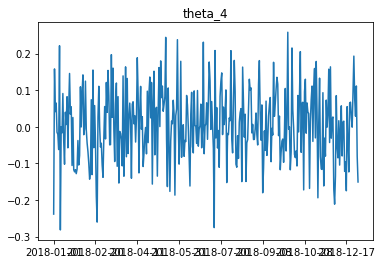

In [14]:
for c in df2.columns:
    df2[c].plot()
    plt.title(c)
    plt.show()

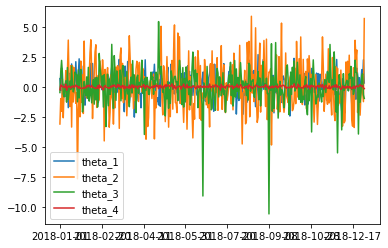

In [15]:
for c in df2.columns:
    df2[c].plot()
plt.legend(df.columns)
plt.show()

Similar observations to those before limiting the data can be carried out. Main difference is that the step nature of $\theta_4$ variable is no longer visible.

In [11]:
df2m = df2.melt()

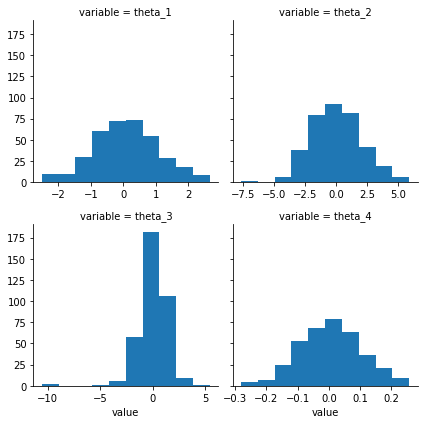

In [12]:
g = sns.FacetGrid(df2m, col='variable', col_wrap=2, sharex = False)
g = g.map(plt.hist, 'value')

Similar observations to those before limiting the data can be carried out. Main difference is that there is only one peak in $\theta_4$'s histogram due to limiting the data to only those samples, which were observed before the step has occured

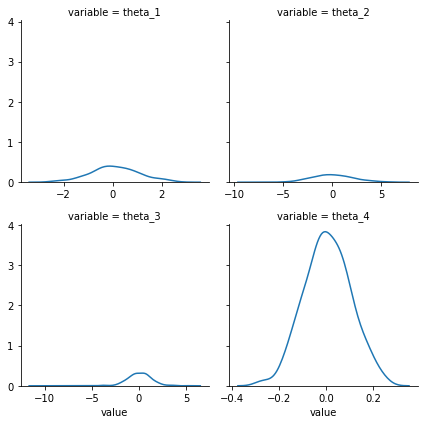

In [13]:
f = sns.FacetGrid(df2m, col='variable', col_wrap=2, sharex = False)
f = f.map(sns.kdeplot, 'value')